# Model Monitoring

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

## Load Clean Data

In [ ]:
clean_data = 'data_clean.csv'

target = 'Default'
rand_xgb = 44

In [ ]:
df_clean = pd.read_csv(clean_data, low_memory=False)
df_clean

In [ ]:
df_sample = df_train.sample(frac=0.1)

X_sample = df_sample.drop(target, axis=1)
y_sample = df_sample[target]

## Train Best Model

In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'gamma': [0, 0.25, 0.5, 0.75],
    'max_depth': [3, 7, 10, 20],
    'n_estimators': [50, 100, 200, 300],
    'random_state': [rand_xgb]
}

In [ ]:
grid_xgb = GridSearchCV(XGBClassifier(), param_grid, cv=5, scoring='roc_auc')
grid_xgb.fit(X_sample, y_sample)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'gamma': [0, 0.25, 0.5, 0.75],
                         'learning_rate': [0.01, 0.1, 0.2, 0.3],
                         'max_depth': [3, 7, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'random_state': [44]},
             scoring='roc_auc')

In [ ]:
# params = grid_xgb.best_params_
params = {'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'random_state': 44}

print('Best Parameters: ', params)

Best Parameters:  {'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'random_state': 44}


In [ ]:
xgb_model = XGBClassifier(**params)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.25, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=44, ...)

In [ ]:
val_acc = xgb_model.score(X_val, y_val)
print('Validation Accuracy: ', round(val_acc,4))

Validation Accuracy:  0.9537


## Feature Importance

In [ ]:
features = pd.DataFrame(xgb_model.feature_importances_, index=X_train.columns, columns=['Importance'])
features = features.sort_values(by='Importance', ascending=False)

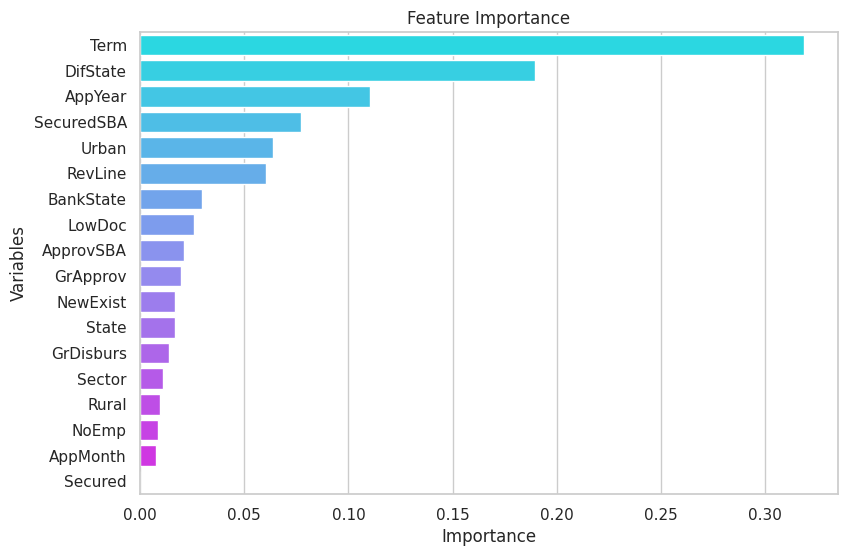

In [ ]:
plt.figure(figsize=(9, 6))
sns.set(style='whitegrid')

sns.barplot(data=features, x='Importance', y=features.index, palette='cool', hue=features.index)

plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Variables')
plt.show()

## Model Monitoring